In [1]:
import glob
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def generate_plot(results, filter_value):
    x = results[[el for el in results.columns if filter_value in el]].reset_index()
    x = x.groupby('index').mean()

    fig = go.Figure()
    for column in x.columns:
        fig.add_trace(go.Scatter(y = x[column], name=column))
    fig.show()

In [3]:
graphs = ['complete', 'barabasi-albert', 'watts_strogatz-1', 'watts_strogatz-2']
ps = np.arange(0, 0.52, 0.02)
qs = ['3', '4']

In [4]:
results = {
    "graph": [],
    "p": [],
    "q": [],
    "value": []
}

for graph, p, q in product(graphs, ps, qs):  
    name = f'{graph}-{p}-{q}'
    
    paths = glob.glob(f'results/{graph}/q-{q}/p-{p}/*.csv')

    res = []
    for path in paths:
        dataframe = pd.read_csv(path)
        magnetization = dataframe.iloc[-1].mean()
        res.append(magnetization)

    results["graph"].append(graph)
    results["p"].append(p)
    results["q"].append(q)
    results["value"].append(np.mean(res))
    
df = pd.DataFrame(results)

In [5]:
df.head()

,graph,p,q,value
0,complete,0.00,3,1.0000
1,complete,0.00,4,1.0000
2,complete,0.02,3,0.9766
3,complete,0.02,4,0.9752
4,complete,0.04,3,0.9472


In [6]:
q3 = pd.pivot_table(data = df[df['q'] == '3'], index = 'p', columns = 'graph', values = 'value')
q4 = pd.pivot_table(data = df[df['q'] == '4'], index = 'p', columns = 'graph', values = 'value')
ws1 = pd.pivot_table(data = df[df['graph'] == 'watts_strogatz-1'], index = 'p', columns = 'q', values = 'value')

# Q-voter model for q = 3

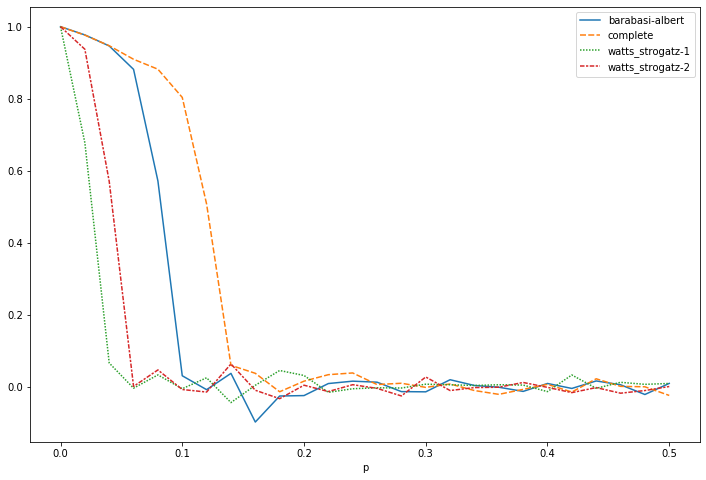

In [7]:
plt.figure(figsize = (12, 8))

sns.lineplot(data = q3)

plt.show()

# Q-voter model for q = 4

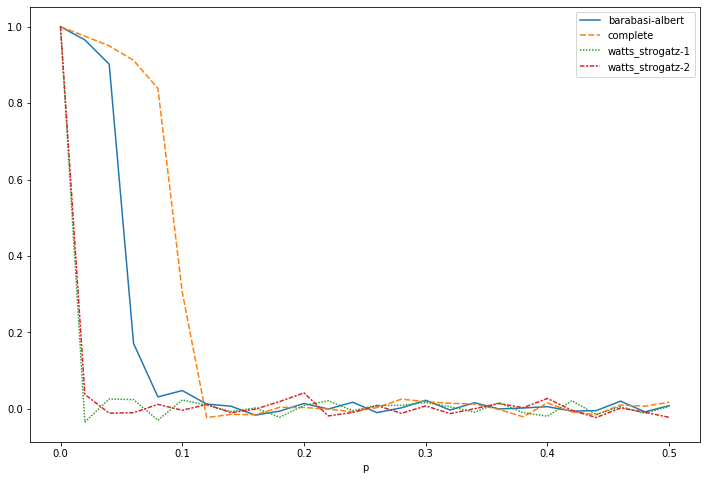

In [8]:
plt.figure(figsize = (12, 8))

sns.lineplot(data = q4)

plt.show()

# Watts-Strogatz model for $q = 3$ and $q = 4$

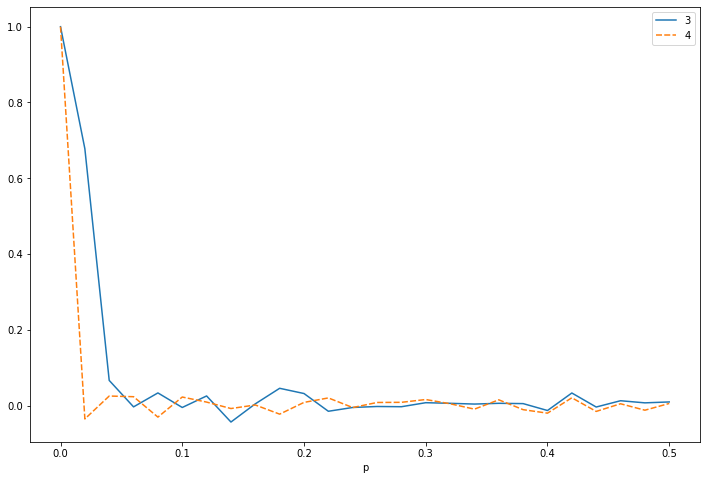

In [9]:
plt.figure(figsize = (12, 8))

sns.lineplot(data = ws1)

plt.show()